# Problemas de Regressão

## Dataset [diabetes](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

"From Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499, we have

'Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.'"

* age 
* sex 
* bmi 
* map 
* tc 
* ldl 
* hdl 
* tch 
* ltg 
* glu 
* y

A variável target é uma medida quantitativa da progressão da doença um ano após a linha de base, ou seja, é um problema de regressão.

Em seguida, para a base de treino, vamos avaliar o MSE e o RMSE dos modelos treinados com os algoritmos:

* regressão linear;

* regressão linear com regularização Ridge;

* regressão linear com regularização Lasso;

* KNN;

* árvore de regressão;

* SVM.

Utilizaremos sua configuração-padrão da biblioteca scikit-learn, ou seja, sem variar seus hiperparâmetros. Para uma melhor avaliação, utilizaremos o método de validação cruzada (10 folds) e compararemos os resultados graficamente por meio de boxplots.

In [3]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes_data = load_diabetes()
df_diabetes = pd.DataFrame(diabetes_data.data,
                           columns=diabetes_data.feature_names)
df_diabetes['target'] = diabetes_data.target

df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

X = df_diabetes.drop('target', axis=1)
y = df_diabetes['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=7)

kfold = KFold(n_splits=10,
              shuffle=True,
              random_state=7)

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

np.random.seed = 7

models = [LinearRegression, Ridge,
          Lasso, SVR,
          KNeighborsRegressor, DecisionTreeRegressor]
cv_results = []

for Model in models:
    cv_results.append((Model.__name__,
                       cross_val_score(Model(),
                                       X_train,
                                       y_train,
                                       cv=kfold,
                                       scoring='neg_mean_squared_error')))
    print(f'{Model.__name__}: '
          f'MSE {abs(cv_results[-1][1].mean()):.2f} ({cv_results[-1][1].std():.2f}) - '
          f'RMSE {np.sqrt(abs(cv_results[-1][1].mean())):.2f}')


LinearRegression: MSE 3066.49 (612.06) - RMSE 55.38
Ridge: MSE 3566.43 (805.54) - RMSE 59.72
Lasso: MSE 3948.91 (890.99) - RMSE 62.84
SVR: MSE 5285.09 (1186.18) - RMSE 72.70
KNeighborsRegressor: MSE 3522.14 (721.76) - RMSE 59.35
DecisionTreeRegressor: MSE 6474.20 (1317.60) - RMSE 80.46


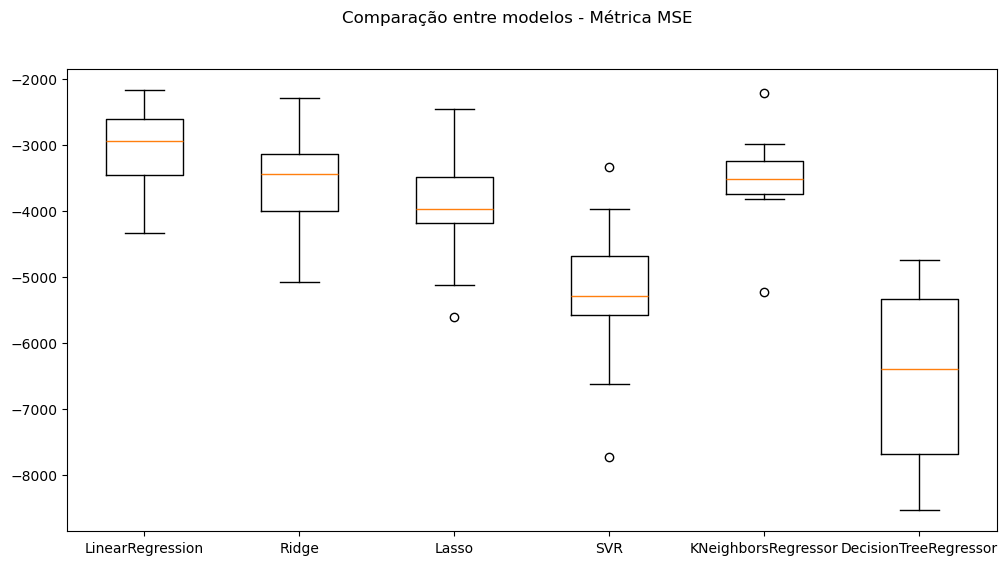

In [15]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Comparação entre modelos - Métrica MSE')
plt.boxplot([results for _, results in cv_results])
ax.set_xticklabels([model for model, _ in cv_results]);

DecisionTreeRegressor foi o modelo que melhor performou

In [17]:
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor(random_state=7)

model.fit(X_train, y_train)

y_hat = model.predict(X_test)

mse = mean_squared_error(y_test, y_hat)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {np.sqrt(abs(mse)):.2f}')

MSE: 4169.57
RMSE: 64.57


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(min_samples_leaf=[2, 3],
                  min_samples_split=[2, 3, 5],
                  max_depth=[2, 4, 6, 8, 10, 20],
                  criterion=['squared_error', 'friedman_mse'])

model_grid = GridSearchCV(estimator=DecisionTreeRegressor(random_state=7),
                          param_grid=param_grid,
                          cv=kfold,
                          scoring='neg_mean_squared_error',
                          verbose=1)

model_grid.fit(X_train, y_train)

y_hat = model_grid.predict(X_test)

mse = mean_squared_error(y_test, y_hat)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {np.sqrt(abs(mse)):.2f}')

Fitting 10 folds for each of 72 candidates, totalling 720 fits
MSE: 3287.13
RMSE: 57.33
